In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/duplicate_questions_pairs.xls")
df.shape

(404290, 6)

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
109510,109510,179718,179719,What truth can you not handle?,Can you handle the truth?,0
323102,323102,421480,362352,What is it like to be a narcissist?,Do narcissists ever cry?,0
78750,78750,134223,134224,Are there any movies about people getting rich...,Why don't more people get rich from manual labor?,0
245271,245271,358082,3434,What day of the week do people use Quora the m...,Why is Quora so popular in India?,0
391805,391805,524435,524436,How are Siddharth agarwal's audit classes for ...,Is the IB diploma worth pursuing? I feel like ...,0
311312,311312,435569,435570,How can the longest stage in the cell cycle be...,What is the function of the longest stage in t...,0
45068,45068,80807,80808,How can I improve my hand lettering skills?,How can I improve my IT skills?,0
337008,337008,464423,121785,What will be the journal entry when VAT paid o...,What are the advantages of a VAT/GST over a Sa...,0
42524,42524,76614,76615,Which is the best mobile below 10k?,Which is the best mobile under 10k₹?,1
130900,130900,209986,209987,Who are the greatest guitarists in the history...,Who is the greatest blues guitarist of all time?,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [8]:
df.duplicated().sum()

np.int64(0)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

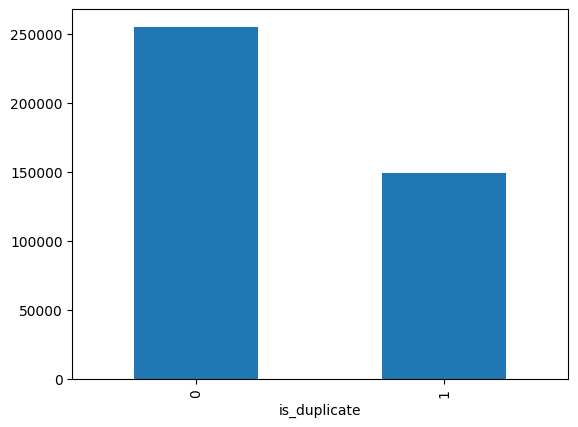

In [9]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


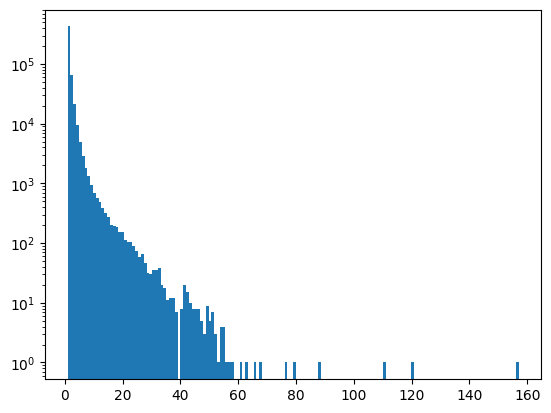

In [11]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

ONLY **BOW**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df2 = pd.read_csv("/content/duplicate_questions_pairs.xls")
df2.shape

(404290, 6)

In [14]:
df2.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [15]:
new_df=df2.sample(30000)

In [16]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [17]:
new_df.duplicated().sum()

np.int64(0)

In [18]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
262265,How do I remove people's likes from my Faceboo...,Is it possible to remove someone's like from a...
262205,How can we improve our handwriting?,How can I have good handwriting?
72499,How can I improve my presence of mind?,What is best way to increase presence of mind?
325568,What should we do to be the best children?,How can I be the best parent for my children?
147619,How can we control our brain?,What controls our brain?


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Ensure there are no NaN values in the data
ques_df['question1'] = ques_df['question1'].fillna("")
ques_df['question2'] = ques_df['question2'].fillna("")

# Assuming ques_df is a DataFrame with 'question1' and 'question2' columns
questions = list(ques_df['question1']) + list(ques_df['question2'])

# Initialize CountVectorizer with a limit on features
cv = CountVectorizer(max_features=3000)

# Fit and transform the merged text data
features = cv.fit_transform(questions).toarray()

# Validate the split index
split_index = len(ques_df['question1'])
assert features.shape[0] == 2 * split_index

q1_arr, q2_arr = np.vsplit(features, [split_index])


<ipython-input-19-7dd10cfe348e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question1'] = ques_df['question1'].fillna("")
<ipython-input-19-7dd10cfe348e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question2'] = ques_df['question2'].fillna("")


In [20]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [21]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
262265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [23]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
262265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
72499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
325568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7423333333333333

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7336666666666667

**BOW_with_basic_features**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [28]:
df3 = pd.read_csv("/content/duplicate_questions_pairs.xls")
df3.shape

(404290, 6)

In [29]:
df3.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [30]:
new_df2 = df.sample(30000,random_state=2)

In [31]:
new_df2.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [32]:
new_df2.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [33]:
new_df2.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [34]:
new_df2.duplicated().sum()

np.int64(0)

is_duplicate
0    19013
1    10987
Name: count, dtype: int64
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

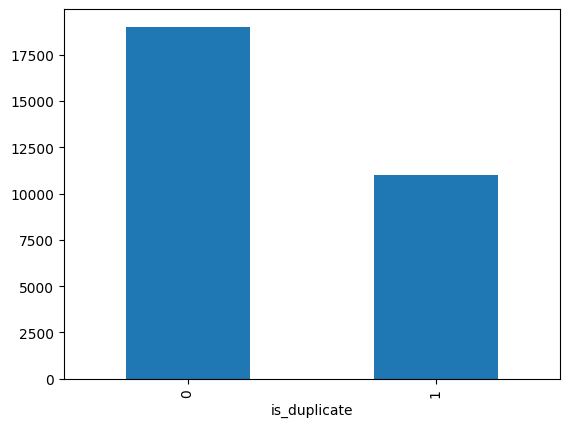

In [35]:
# Distribution of duplicate and non-duplicate questions

print(new_df2['is_duplicate'].value_counts())
print((new_df2['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df2['is_duplicate'].value_counts().plot(kind='bar')

In [36]:
# Repeated questions

qid = pd.Series(new_df2['qid1'].tolist() + new_df2['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55299
Number of questions getting repeated 3480


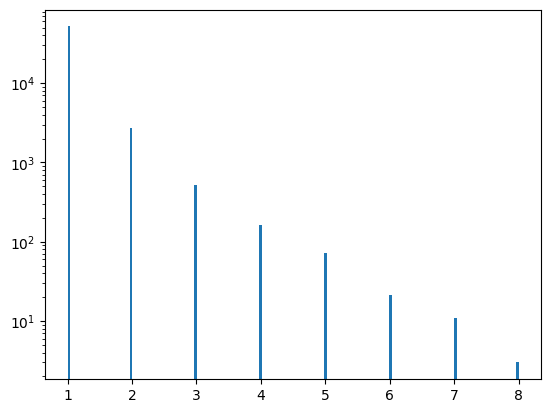

In [37]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [38]:
# Feature Engineering

new_df2['q1_len'] = new_df2['question1'].str.len()
new_df2['q2_len'] = new_df2['question2'].str.len()

In [40]:
new_df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [41]:
new_df2['q1_num_words'] = new_df2['question1'].apply(lambda row: len(row.split(" ")))
new_df2['q2_num_words'] = new_df2['question2'].apply(lambda row: len(row.split(" ")))
new_df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [42]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [43]:
new_df2['word_common'] = new_df2.apply(common_words, axis=1)
new_df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [44]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [45]:
new_df2['word_total'] = new_df2.apply(total_words, axis=1)
new_df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [46]:
new_df2['word_share'] = round(new_df2['word_common']/new_df2['word_total'],2)
new_df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


minimum characters 2
maximum characters 391
average num of characters 59


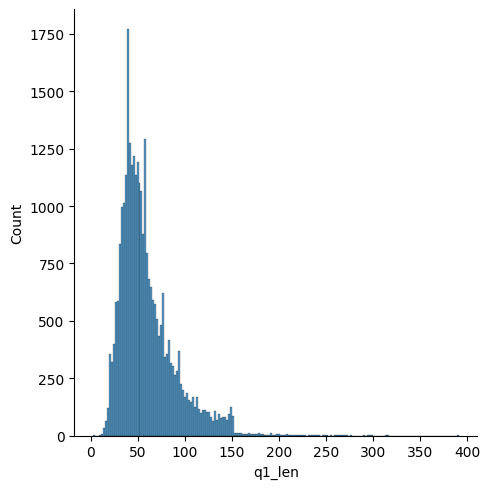

In [47]:
# Analysis of features
sns.displot(new_df2['q1_len'])
print('minimum characters',new_df2['q1_len'].min())
print('maximum characters',new_df2['q1_len'].max())
print('average num of characters',int(new_df2['q1_len'].mean()))

minimum characters 6
maximum characters 1151
average num of characters 60


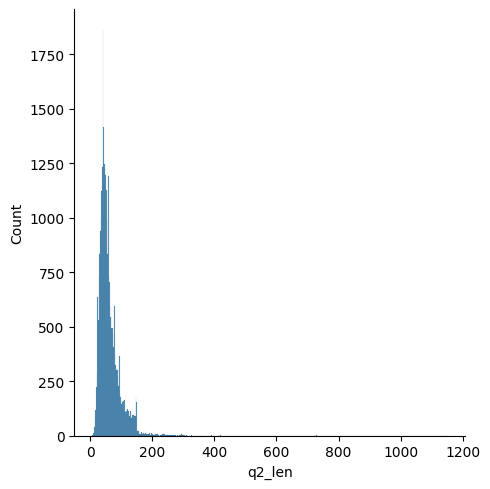

In [48]:
sns.displot(new_df2['q2_len'])
print('minimum characters',new_df2['q2_len'].min())
print('maximum characters',new_df2['q2_len'].max())
print('average num of characters',int(new_df2['q2_len'].mean()))

minimum words 1
maximum words 72
average num of words 10


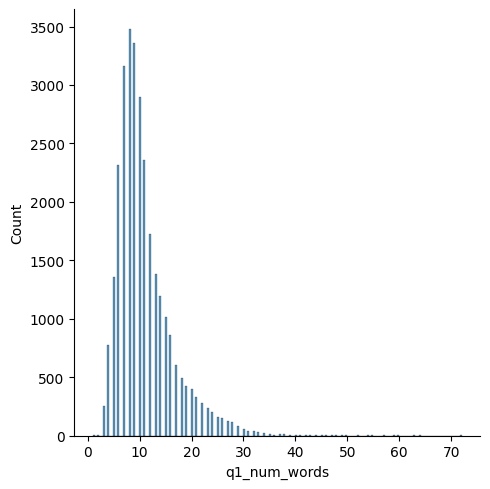

In [49]:
sns.displot(new_df2['q1_num_words'])
print('minimum words',new_df2['q1_num_words'].min())
print('maximum words',new_df2['q1_num_words'].max())
print('average num of words',int(new_df2['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


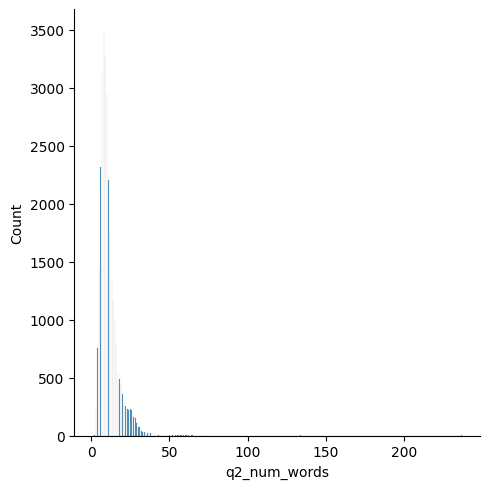

In [50]:
sns.displot(new_df2['q2_num_words'])
print('minimum words',new_df2['q2_num_words'].min())
print('maximum words',new_df2['q2_num_words'].max())
print('average num of words',int(new_df2['q2_num_words'].mean()))

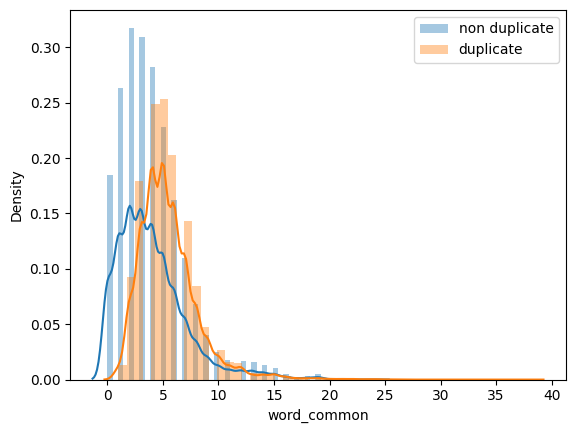

In [51]:
# common words
sns.distplot(new_df2[new_df2['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df2[new_df2['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

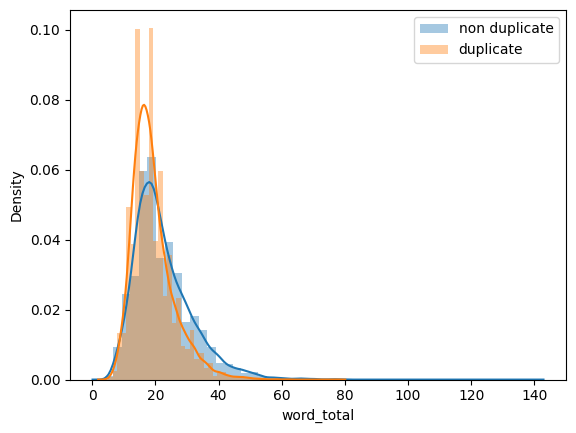

In [52]:
# total words
sns.distplot(new_df2[new_df2['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df2[new_df2['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

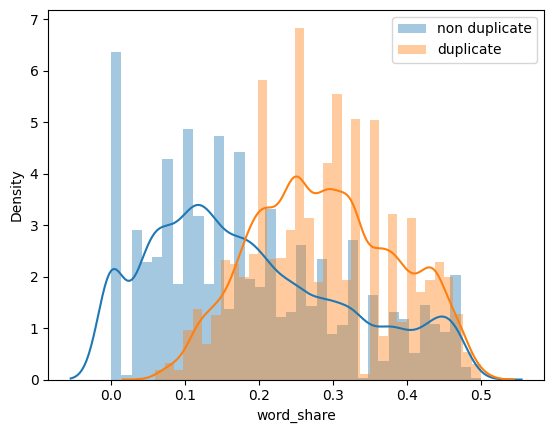

In [53]:
# word share
sns.distplot(new_df2[new_df2['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df2[new_df2['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [54]:
ques_df2 = new_df2[['question1','question2']]
ques_df2.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [55]:
final_df = new_df2.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Ensure there are no NaN values in the data
ques_df2['question1'] = ques_df2['question1'].fillna("")
ques_df2['question2'] = ques_df2['question2'].fillna("")

# Assuming ques_df is a DataFrame with 'question1' and 'question2' columns
questions2 = list(ques_df2['question1']) + list(ques_df2['question2'])

# Initialize CountVectorizer with a limit on features
cv = CountVectorizer(max_features=3000)

# Fit and transform the merged text data
features = cv.fit_transform(questions2).toarray()

# Validate the split index
split_index = len(ques_df2['question1'])
assert features.shape[0] == 2 * split_index

q1_arr, q2_arr = np.vsplit(features, [split_index])

In [57]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df2.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df2.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [58]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7711666666666667

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7661666666666667